In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# 1.1 Learning with Models: Statistical Estimation

def SampleGenerator(m,n):
    """
    Output the paramerization A with entries iid bernoulli
    """
    return np.random.binomial(1, 1/(m), (m,n))

def InputsGenerator(n):
    """
    Output the random vector from normal distribution
    """    
    return np.random.normal(np.zeros(n), ((np.sqrt(0.5 / n))) * np.ones(n))


def TrainingSetGenerator(A,q):
    [m,n] = A.shape
    X = InputsGenerator(n)
    Y = (A @ X + InputsGenerator(m))

    for i in range(q - 1):
        X = np.column_stack((X, InputsGenerator(n)))
        Y = np.column_stack((Y, A @ X[:, -1] + InputsGenerator(m)))

    X = X.T
    Y = Y.T
    return X,Y

m = 10**2
n = 10**2
Q = 10**3
A = SampleGenerator(m,n)
T_x, T_y = TrainingSetGenerator(A,Q)
T_x_prime, T_y_prime = TrainingSetGenerator(A,Q)

# optimal solution for the given parametrization
H = T_y.T@T_x@np.linalg.inv(T_x.T@T_x)

print("The MSE on the training set is %f" % (np.linalg.norm(T_y - T_x@H.T)**2/Q))
print("The MSE on the unseen set is %f" % (np.linalg.norm(T_y_prime-T_x_prime@H.T)**2/Q))
print("The total energy of the samples is %f" % (np.trace(T_y.T@T_y)/Q))

The MSE on the training set is 0.451337
The MSE on the unseen set is 0.557538
The total energy of the samples is 1.026320


In [ ]:
# In the second part of the problem (3.2), we are asked to generate data according to the sign data and to learn a linear model.

def TrainingSetGenerator(A,q):
    [m,n] = A.shape
    X = InputsGenerator(n)
    Y = (A @ X + InputsGenerator(m))

    for i in range(q - 1):
        X = np.column_stack((X, InputsGenerator(n)))
        Y = np.column_stack((Y, A @ X[:, -1] + InputsGenerator(m)))

    X = X.T
    Y = np.sign(Y.T)
    return X,Y


m = 10**2
n = 10**2
Q = 10**3
A = SampleGenerator(m,n)
T_x, T_y = TrainingSetGenerator(A,Q)
T_x_prime, T_y_prime = TrainingSetGenerator(A,Q)

H = T_y.T@T_x@np.linalg.inv(T_x.T@T_x)

print("The MSE on the training set is %f" % (np.linalg.norm(T_y - T_x@H.T)**2/Q))
print("The MSE on the unseen set is %f" % (np.linalg.norm(T_y_prime - T_x_prime@H.T)**2/Q))
print("The total energy of the samples is %f" % (np.trace(T_y.T@T_y)/Q))

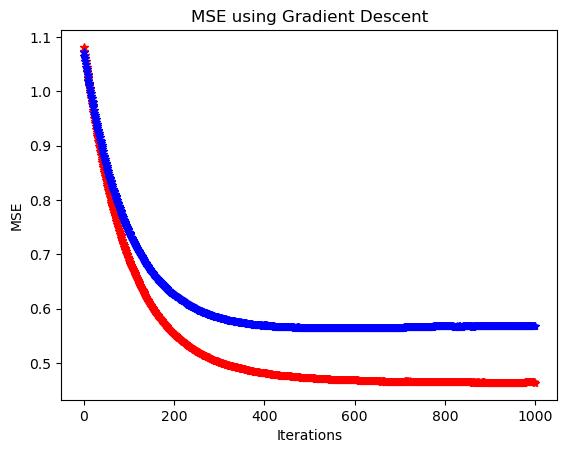

In [3]:
# 4.2 – 4.2   Stochastic Gradient Descent (SGD)

def Grad(X,Y,H):
    matricial = (1/X.shape[0])*(-Y.T + H@X.T)@(X)
    return matricial

n = 10**2
m = 10**2
Q = 10**3

b_size = 10  # Batch Size
stepsize = 1 # Stepsize, e.g. epsilon

A = SampleGenerator(m,n)
T_x, T_y = TrainingSetGenerator(A,Q)
Test_x, Test_y = TrainingSetGenerator(A,Q)

H = np.zeros((m,n))
error_train=[]
error_test=[]

for i in range(Q):
    permutation = np.random.permutation(Q) # Get an with the first Q integers in random order
    mb_x = np.array([ T_x[index] for index in permutation[0:b_size] ])  # Sub Sample Training Set
    mb_y = np.array([ T_y[index] for index in permutation[0:b_size] ])  # Sub Sample Training Set

    grad = Grad(mb_x, mb_y,H) # Compute Gradient
    H = H - stepsize*grad    # Compute the learning step

    error_train = error_train + [np.linalg.norm(T_y.T - H@T_x.T)**2/Q]
    error_test = error_test + [np.linalg.norm(Test_y.T - H@Test_x.T)**2/Q]


plt.plot(range(len(error_train)),error_train,'*r') #Plot
plt.plot(range(len(error_train)),error_test,'*b') #Plot

plt.title('MSE using Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.savefig('MSE_computing_grad.pdf', bbox_inches='tight', dpi=150)
plt.show()